In [9]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

In [10]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    print("hi5")
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [11]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

hi5


y = [0] , es ==non-cat==imagen


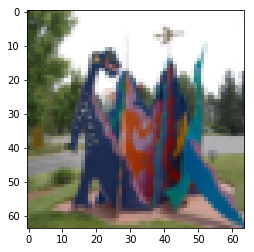

In [12]:
index =  201
plt.imshow(train_set_x_orig[index])
print("y = "+str(train_set_y[:, index])+ " , es =="+classes[np.squeeze(train_set_y[:, index])].decode("utf-8")+ "==imagen")

In [13]:
train_set_x_orig_flatten = train_set_x_orig.reshape (train_set_x_orig.shape [0], -1).T 
test_set_x_orig_flatten = test_set_x_orig.reshape (test_set_x_orig.shape [0], -1).T 


In [14]:

def inicializar_zeros(dimension):
    w = np.zeros((dimension, 1),dtype='float')
    b = 0
    assert(w.shape == (dimension,1))
    assert(isinstance(b,float) or isinstance(b,int))
    return w ,b

In [15]:
train_set_x = train_set_x_orig_flatten/255
test_set_x = test_set_x_orig_flatten/255

In [16]:
def sigmoide(self):
  return 1 / (1 + np.exp(-self))

In [17]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoide(np.dot(w.T, X) + b)
    cost = (-1/m)*np.sum((Y*np.log(A)+ (1-Y)*np.log(1-A)), axis = 1)
    #BACKWARD PROPAGATION
    
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {
        "dw": dw,
        "db": db
    }
    
    return grads, cost


In [18]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [19]:
def optimizar(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        ### START CODE HERE ###
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        # Recuperar las derivadas de grads
        dw = grads["dw"]
        db = grads["db"]
        
        # Actualizar los persos
        ###      θ = θ − α dθ,
        ### START CODE HERE ###
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        ### END CODE HERE ###
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Costo despues de iteracion %i: %f" %(i, cost))
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    return params, grads, costs

In [20]:

params, grads, costs = optimizar(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


In [21]:

### PREDICCION
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Calcule el vector &quot;A&quot; que predice las probabilidades de que un gato esté presente en la imagen
    A = sigmoide(np.dot(w.T, X)+b)
    #return A
    
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        # Convierte la probabilidad A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ###
        if (A[0][i] <= 0.5):
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1
        #pass
        ### END CODE HERE ###
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [22]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost =False):

    # Inicializa los parámetros con zeros

    w, b = inicializar_zeros(X_train.shape[0])

    # Gradiente descendiente
    
    parameters, grads, costs = optimizar(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Obtener los parametros w and b de "parameters"
    w = parameters["w"]
    b = parameters["b"]
    # Realizar las predicción con los datos de entrenamiento y los datos de prueba)

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    ### END CODE HERE ###
    # Imprimir el accuracy del modelo
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs, "Y_prediction_test": Y_prediction_test,
    "Y_prediction_train" : Y_prediction_train, "w" : w, "b" : b,
    "learning_rate" : learning_rate, "num_iterations": num_iterations}

    return d

In [24]:
d = model(train_set_x, train_set_y,test_set_x,test_set_y,10000,0.001, False )

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


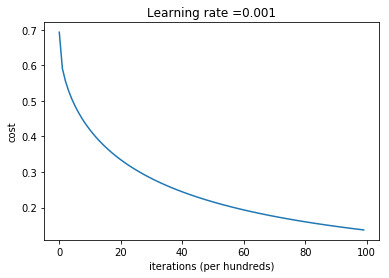

In [27]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %
learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %
learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



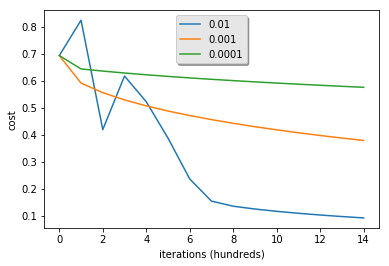

In [29]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500,
learning_rate = i, print_cost = False)
print ('\n' + "-------------------------------------------------------" + '\n')
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

C:\Users\Lenovo\Anaconda3\envs\Tensor-oficial\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\Lenovo\Anaconda3\envs\Tensor-oficial\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  
C:\Users\Lenovo\Anaconda3\envs\Tensor-oficial\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


y = 0.0, your algorithm predicts a "non-cat" picture.


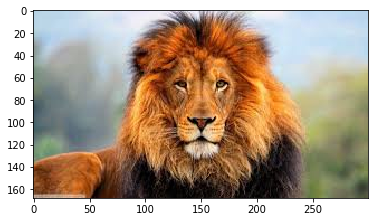

In [38]:
#MI IMAGENN
my_image = "imagen.jpg"
fname = "imagenes/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
num_px = train_set_x_orig.shape[2]
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T

my_predicted_image = predict(d["w"], d["b"], my_image)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" +
classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" picture.")

y = 1.0, your algorithm predicts a "cat" picture.


C:\Users\Lenovo\Anaconda3\envs\Tensor-oficial\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\Lenovo\Anaconda3\envs\Tensor-oficial\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


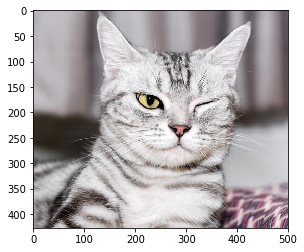

In [39]:
#MI IMAGENN  2
my_image = "imagen1.jpg"
fname = "imagenes/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
num_px = train_set_x_orig.shape[2]
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T

my_predicted_image = predict(d["w"], d["b"], my_image)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" +
classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" picture.")

y = 1.0, your algorithm predicts a "cat" picture.


C:\Users\Lenovo\Anaconda3\envs\Tensor-oficial\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\Lenovo\Anaconda3\envs\Tensor-oficial\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


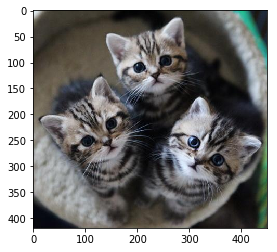

In [40]:
#MI IMAGENN  2
my_image = "imagen2.jpg"
fname = "imagenes/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
num_px = train_set_x_orig.shape[2]
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T

my_predicted_image = predict(d["w"], d["b"], my_image)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" +
classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" picture.")

C:\Users\Lenovo\Anaconda3\envs\Tensor-oficial\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\Lenovo\Anaconda3\envs\Tensor-oficial\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


y = 1.0, your algorithm predicts a "cat" picture.


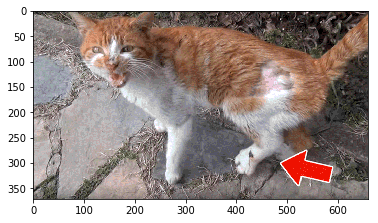

In [43]:
#MI IMAGENN  2
my_image = "imagen3.png"
fname = "imagenes/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
num_px = train_set_x_orig.shape[2]
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T

my_predicted_image = predict(d["w"], d["b"], my_image)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" +
classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" picture.")